<a href="https://colab.research.google.com/github/NayanMattani/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting whether the patient has diabetes or not based on Pima Indians Diabates Database

In [3]:
# importing the libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, roc_curve, roc_auc_score, auc, f1_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.7 MB/s eta 0:00:00


Step 1 : Loading the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive

Mounted at /content/drive
/content/drive/My Drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Step 2: Exploratory Data Analysis

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Information about columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
df.shape

(768, 9)

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Missing Values Analysis

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Feature Distribution Analysis

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

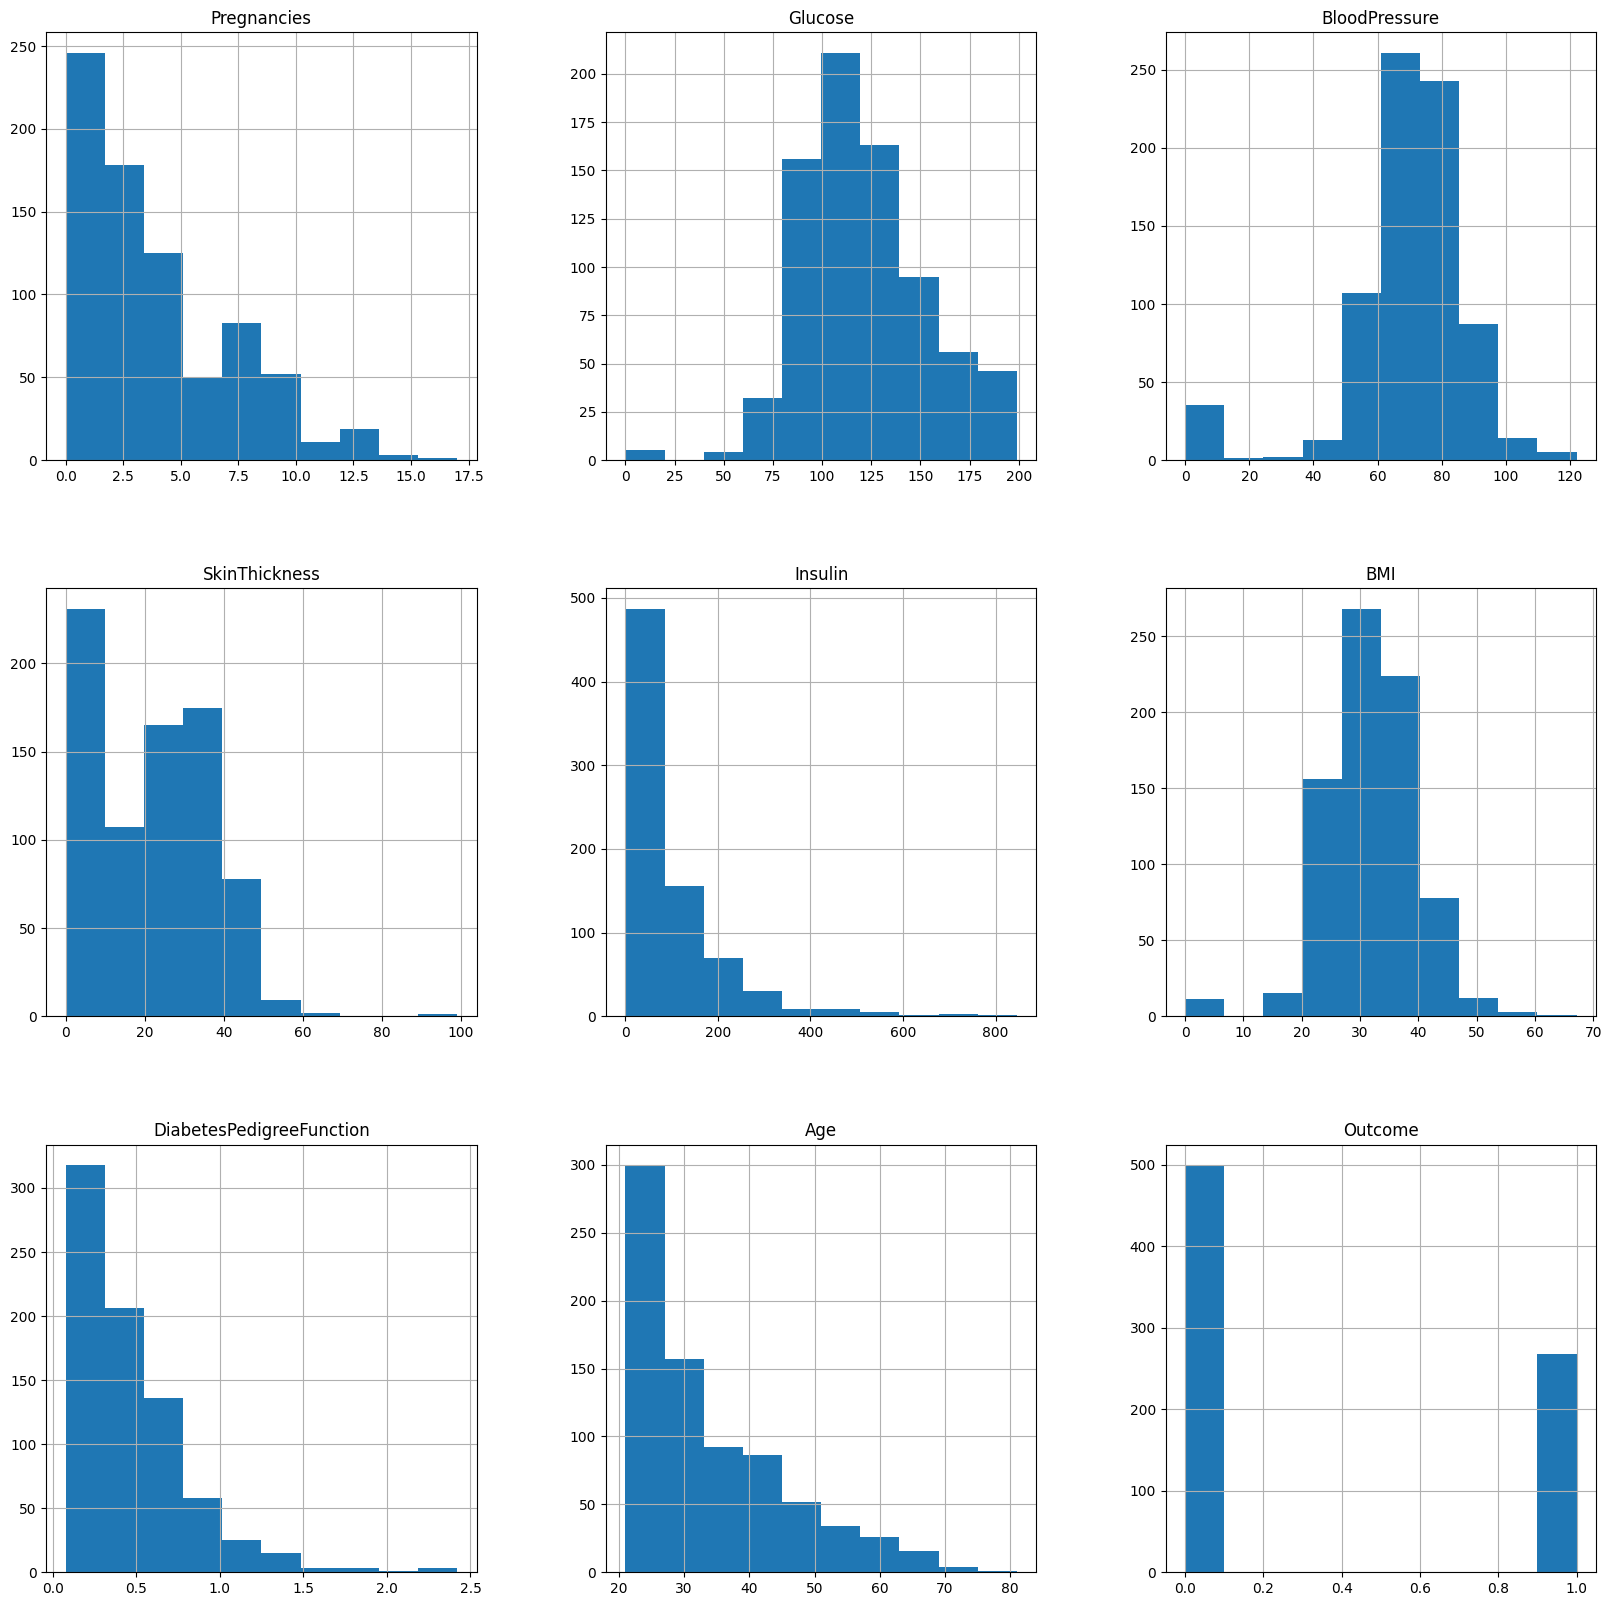

In [12]:
df.hist(figsize = (20, 20) )

Class Distribution Analysis

In [13]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Correlation among all the features

<Axes: >

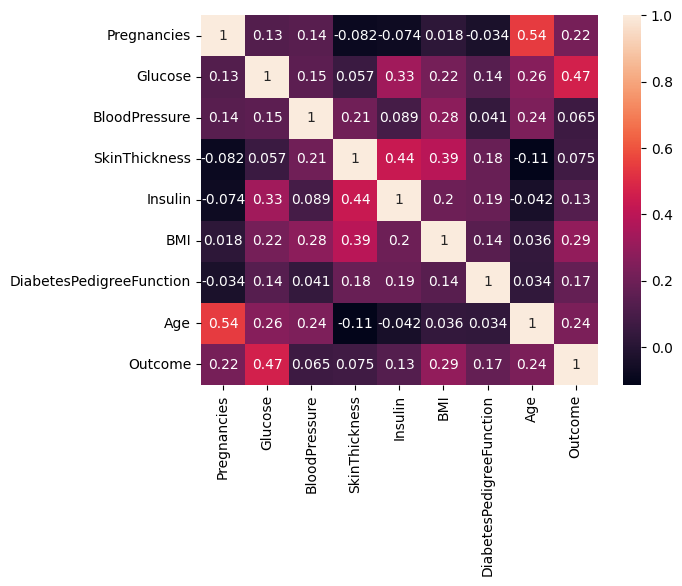

In [14]:
sns.heatmap(df.corr(), annot = True)

Step 3: Data Preparation and Splitting the data 

In [15]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']
print(X.head())
print(y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


Step 4 : Building the ML Models and Validation the models

In [33]:
# Instantiating the classifiers and make a list
classifiers = [
  DecisionTreeClassifier(criterion = 'gini', min_samples_leaf =1, max_depth = 4, ccp_alpha = 1 ),
  # DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf =1, max_depth = 4, ccp_alpha = 1 ),
  SVC(C = 1, kernel = 'linear', gamma = "scale", shrinking = True, probability = True),
  # SVC(C = 1, kernel = 'rbf', gamma = "scale", shrinking = True, probability = True),
  # SVC(C = 1, kernel = 'poly', gamma = "scale", shrinking = True, probability = True),
  # SVC(C = 1, kernel = 'sigmoid', gamma = "scale", shrinking = True, probability = True),
  LogisticRegression(penalty = 'l2', tol =0.0001, C=1.0, fit_intercept = True),
  MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None),
  KNeighborsClassifier(n_neighbors = 5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski'),
  RandomForestClassifier(n_estimators = 1000, criterion= 'gini', min_samples_leaf= 2, max_depth = 4, ccp_alpha = 1 ),
  GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 1000, min_samples_split = 2, ccp_alpha = 1),
  XGBClassifier(n_estimators = 1000, max_depth = 4, learning_rate = 0.1, reg_lambda = 0.1, objective = 'binary:logistic'),
  CatBoostClassifier(iterations = 10, verbose = 5),
  LGBMClassifier( n_estimators = 1000, max_depth = 4, learning_rate = 0.1, reg_lambda = 0.1 , boosting_type = 'gbdt')
]

# Defining the result table as a dataframe
result_table = pd.DataFrame(columns = ['classifiers', 'TPR', 'FPR', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'AUPRC', 'AUROC'] )

# Train the models and record the results
for cls in classifiers:

  model = cls.fit(X_train, y_train)
  predictions = model.predict(X_test)
  # Accuracy
  accuracy = accuracy_score(y_test, predictions)
  yproba = model.predict_proba(X_test)[::,1]

  #define the metrics
  fpr, tpr, _ = roc_curve(y_test, yproba)
  auroc = roc_auc_score(y_test, yproba)

  # precision, recall 
  precision, recall, thresholds = precision_recall_curve(y_test, yproba)
  auprc = auc(recall, precision)

  #f1_score
  f1score = f1_score(y_test, predictions) 

  # classification results of test dataset
  result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                       'TPR': tpr,
                                       'FPR' :fpr,
                                       'Accuracy': accuracy,
                                       'Precision': precision,
                                       'Recall': recall,
                                       'F1-score': f1score,
                                       'AUPRC': auprc,
                                       'AUROC': auroc}, ignore_index = True
                                       )

# set name of the classifiers as index lables
result_table.set_index('classifiers', inplace = True)




Learning rate set to 0.5
0:	learn: 0.5808486	total: 4.17ms	remaining: 37.6ms
5:	learn: 0.4224941	total: 10.3ms	remaining: 6.89ms
9:	learn: 0.3800262	total: 18.3ms	remaining: 0us


In [19]:
result_table

,TPR,FPR,Accuracy,Precision,Recall,F1-score,AUPRC,AUROC
classifiers,,,,,,,,
DecisionTreeClassifier,"[0.0, 1.0]","[0.0, 1.0]",0.640693,"[0.3593073593073593, 1.0]","[1.0, 0.0]",0.000000,0.679654,0.500000
DecisionTreeClassifier,"[0.0, 1.0]","[0.0, 1.0]",0.640693,"[0.3593073593073593, 1.0]","[1.0, 0.0]",0.000000,0.679654,0.500000
SVC,"[0.0, 0.012048192771084338, 0.0963855421686747...","[0.0, 0.0, 0.0, 0.006756756756756757, 0.006756...",0.740260,"[0.3593073593073593, 0.36086956521739133, 0.35...","[1.0, 1.0, 0.9879518072289156, 0.9879518072289...",0.565217,0.711203,0.804380
SVC,"[0.0, 0.012048192771084338, 0.0361445783132530...","[0.0, 0.0, 0.0, 0.006756756756756757, 0.006756...",0.748918,"[0.3593073593073593, 0.36086956521739133, 0.36...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.553846,0.677204,0.804624
SVC,"[0.0, 0.012048192771084338, 0.0361445783132530...","[0.0, 0.0, 0.0, 0.006756756756756757, 0.006756...",0.735931,"[0.3593073593073593, 0.3565217391304348, 0.358...","[1.0, 0.9879518072289156, 0.9879518072289156, ...",0.519685,0.667810,0.792250
SVC,"[0.0, 0.012048192771084338, 0.0240963855421686...","[0.0, 0.0, 0.0, 0.006756756756756757, 0.006756...",0.484848,"[0.3593073593073593, 0.36086956521739133, 0.36...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.091603,0.561608,0.702214
LogisticRegression,"[0.0, 0.012048192771084338, 0.0481927710843373...","[0.0, 0.0, 0.0, 0.006756756756756757, 0.006756...",0.757576,"[0.3593073593073593, 0.36086956521739133, 0.36...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.9879518072289156, ...",0.605634,0.705198,0.807799
MultinomialNB,"[0.0, 0.0963855421686747, 0.0963855421686747, ...","[0.0, 0.02027027027027027, 0.05405405405405406...",0.627706,"[0.3593073593073593, 0.3565217391304348, 0.353...","[1.0, 0.9879518072289156, 0.9759036144578314, ...",0.441558,0.464356,0.550065
KNeighborsClassifier,"[0.0, 0.08433734939759036, 0.27710843373493976...","[0.0, 0.006756756756756757, 0.0405405405405405...",0.688312,"[0.3593073593073593, 0.4294117647058823, 0.567...","[1.0, 0.8795180722891566, 0.7108433734939759, ...",0.500000,0.640122,0.732579


DecisionTreeClassifier
SVC
LogisticRegression
MultinomialNB
KNeighborsClassifier
RandomForestClassifier
GradientBoostingClassifier
XGBClassifier
CatBoostClassifier
LGBMClassifier


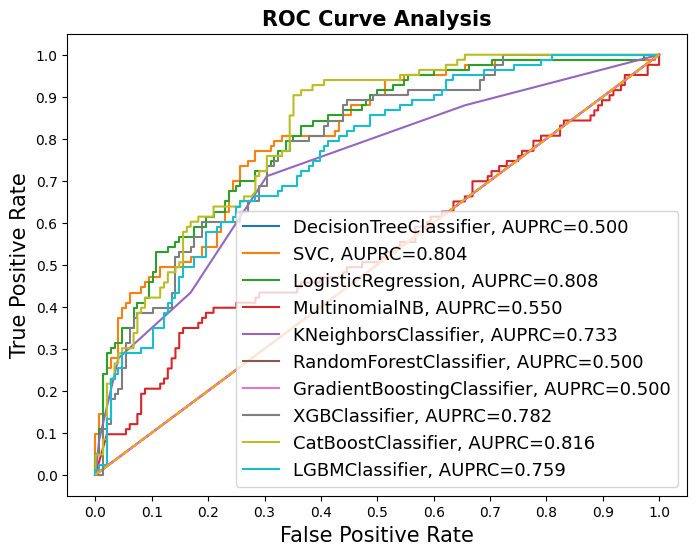

In [37]:
## ROC Curve Analysis
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
  print(i)
  plt.plot(result_table.loc[i]['FPR'], 
             result_table.loc[i]['TPR'],
             label="{}, AUPRC={:.3f}".format(i, result_table.loc[i]['AUROC']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

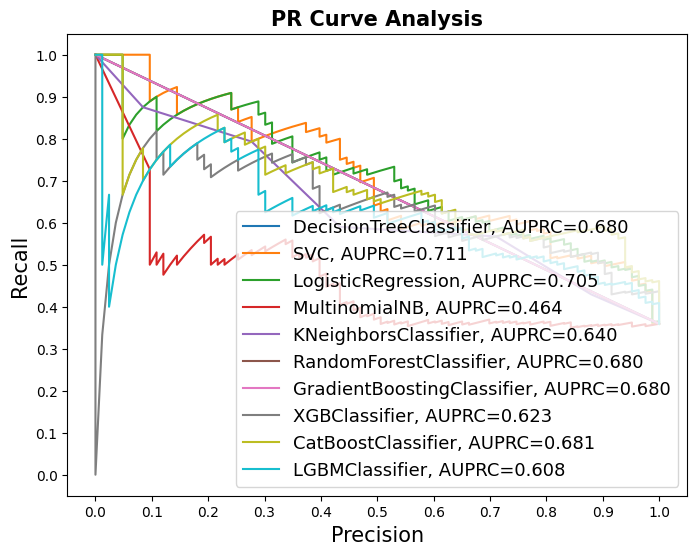

In [38]:
## Precision Recall Curve Analysis
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['Recall'], 
             result_table.loc[i]['Precision'], 
             label="{}, AUPRC={:.3f}".format(i, result_table.loc[i]['AUPRC']))
    

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Precision", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Recall", fontsize=15)

plt.title('PR Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()